Before running this code, make sure you have these files available.

* CPIAUCSL.csv - US CPI (inflation measure)
* RRVRUSQ156N.csv - rental vacancy rate, quarterly
* MORTGAGE30US.csv - mortgage interest rates, weekly
* Metro_median_sale_price_uc_sfrcondo_week.csv - median sale price for US houses
* Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv - if you take all houses in U.S, how much does zillow think avg. house is worth?

Read datasets

In [ ]:
import pandas as pd

########## FED FILES ############
fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]


In [ ]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2024-04-04,6.82
2024-04-11,6.88
2024-04-18,7.10


In [ ]:
#concatenating all 3 fed datasets, missing values appear b/c not every dataset is on same timeline
fed_data = pd.concat(dfs, axis=1)


In [ ]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2024-04-04,6.82,NaN,NaN
2024-04-11,6.88,NaN,NaN
2024-04-18,7.10,NaN,NaN


In [ ]:
#assuming that the rates will be the same for each group, we use forward fill method to fill mssing values
# by carrying forward the last observed value to fill in the gaps
fed_data = fed_data.ffill().dropna()

In [ ]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.10
1971-04-09,7.31,5.3,40.10
1971-04-16,7.31,5.3,40.10
1971-04-23,7.31,5.3,40.10
1971-04-30,7.29,5.3,40.10
...,...,...,...
2024-04-04,6.82,6.6,312.23
2024-04-11,6.88,6.6,312.23
2024-04-18,7.10,6.6,312.23


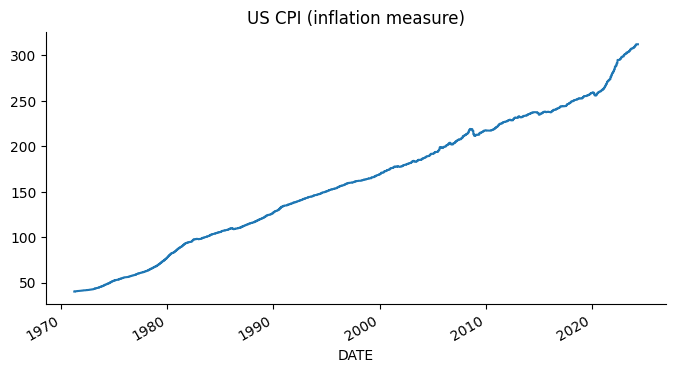

In [ ]:
# US CPI (inflation measure)

from matplotlib import pyplot as plt
fed_data['CPIAUCSL'].plot(kind='line', figsize=(8, 4), title='US CPI (inflation measure)')
plt.gca().spines[['top', 'right']].set_visible(False)

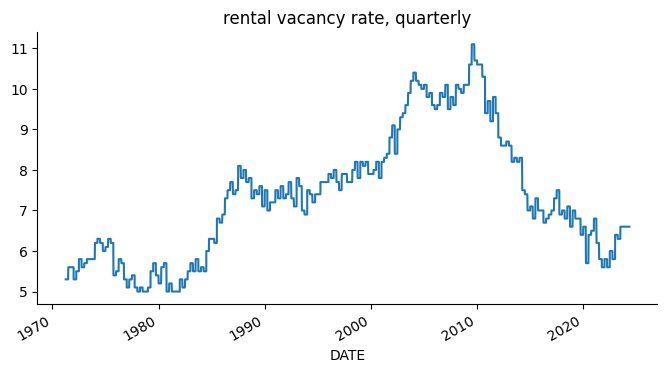

In [ ]:
# rental vacancy rate, quarterly

from matplotlib import pyplot as plt
fed_data['RRVRUSQ156N'].plot(kind='line', figsize=(8, 4), title='rental vacancy rate, quarterly')
plt.gca().spines[['top', 'right']].set_visible(False)

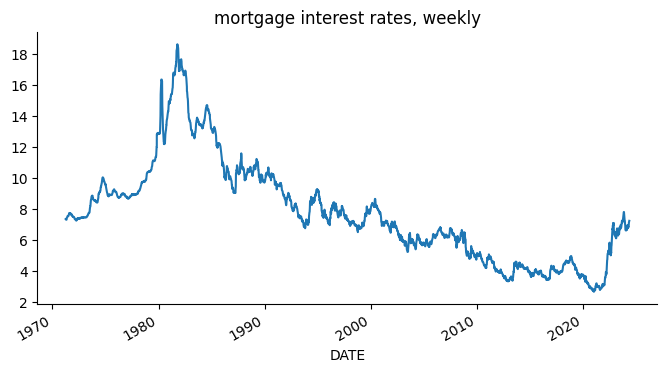

In [ ]:
# mortgage interest rates, weekly

from matplotlib import pyplot as plt
fed_data['MORTGAGE30US'].plot(kind='line', figsize=(8, 4), title='mortgage interest rates, weekly')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
######### ZILLOW FILES ###########
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

dfs = [pd.read_csv(f) for f in zillow_files]

In [ ]:
dfs[0]
#each row is a region in U.S with except of first row is b/c its whole country, but then its NY, and so
# takes the average house price of that region


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2024-01-06,2024-01-13,2024-01-20,2024-01-27,2024-02-03,2024-02-10,2024-02-17,2024-02-24,2024-03-02,2024-03-09
0,102001,0,United States,country,NaN,176500.0,171450.0,173000.0,169000.0,177000.0,...,325000.0,325000.0,325000.0,319000.0,325392.0,325000.0,339000.0,336000.0,348000.0,342500.0
1,394913,1,"New York, NY",msa,NY,395000.0,405917.0,410250.0,410000.0,387000.0,...,577500.0,565000.0,580000.0,576500.0,565000.0,560000.0,579000.0,555000.0,580000.0,600000.0
2,753899,2,"Los Angeles, CA",msa,CA,451000.0,460000.0,474000.0,482000.0,460000.0,...,870000.0,908500.0,831500.0,850000.0,871000.0,887000.0,910500.0,930000.0,940000.0,910000.0
3,394463,3,"Chicago, IL",msa,IL,227500.0,220000.0,225000.0,214750.0,227500.0,...,282000.0,290000.0,290000.0,280500.0,281250.0,280000.0,285000.0,287500.0,312500.0,300000.0
4,394514,4,"Dallas, TX",msa,TX,136500.0,129000.0,140500.0,137000.0,139177.0,...,370000.0,375322.0,360972.0,361875.0,365000.0,371475.0,385000.0,378430.0,385000.0,385000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,753912,398,"Pinehurst, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,467500.0,440000.0,458000.0,480500.0
233,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,620000.0,702500.0,772500.0,700000.0,655000.0,665000.0,580000.0,600000.0,616000.0,570000.0
234,394744,442,"Key West, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,1315000.0,1195000.0,996500.0,1125000.0,1075000.0,789000.0,985000.0,1326000.0,942500.0,944000.0
235,395085,457,"Seneca, SC",msa,SC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333450.0,251000.0,280000.0


In [ ]:
dfs[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
0,102001,0,United States,country,NaN,102789.697694,103049.939217,103601.622885,104351.865312,105161.916479,...,353640.634872,356262.355375,357085.870800,356748.578567,355613.153027,354235.494756,352081.874078,350636.799503,351690.121318,355696.229487
1,394913,1,"New York, NY",msa,NY,179596.380743,178856.580865,178684.932576,178910.659409,179777.907182,...,628172.695628,634305.247586,637038.141571,638235.028235,639271.893464,639241.206992,640361.830756,640944.434908,644510.788421,652100.187384
2,753899,2,"Los Angeles, CA",msa,CA,188228.766606,189391.933782,190272.257732,190645.410038,191297.662169,...,919426.533170,929936.596980,934882.553268,938091.463052,938967.819386,938254.947161,934470.568092,933826.222466,940735.867608,959411.775343
3,394463,3,"Chicago, IL",msa,IL,131019.144914,130419.940343,131850.332535,133549.662356,135127.044169,...,310026.007292,313894.273983,315501.489267,315410.589104,314775.197265,313176.519853,310949.043289,309748.832259,311209.933213,315995.373812
4,394514,4,"Dallas, TX",msa,TX,110372.477528,111053.984565,112113.173095,112967.688376,113478.507429,...,382932.772867,383939.188533,383199.276441,380993.803323,378333.120312,376025.635219,373315.372483,372514.011718,374497.205170,378460.756365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,125821.257591,127663.387675,127210.162257,125380.594235,122231.845110,118495.811851,115758.607696,112106.279341,111694.242641,114378.564501
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,399748.763652,402617.809917,400036.165874,394390.752707,387229.751279,384733.818580,378347.271194,378231.120329,378924.356279,381718.718046
892,753874,937,"Craig, CO",msa,CO,67939.666569,68287.852387,69087.433951,69321.217969,70470.343646,...,281140.320620,284448.197610,285114.275990,285994.410948,286361.975721,283928.506371,280350.547608,277441.285953,277484.859647,278787.023657
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,99354.530238,99047.488658,97709.840251,95700.639004,94191.157814,90993.517394,89440.579535,90063.072944,89464.852820,90856.415640


In [ ]:
# so we only take the first row, and remove first 5 columns
# then we take cut off the day part, so we are only left w month,
#will give us common column to join both dataframes on
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [ ]:
dfs[0]

,0,month
2008-02-02,176500.0,2008-02
2008-02-09,171450.0,2008-02
2008-02-16,173000.0,2008-02
2008-02-23,169000.0,2008-02
2008-03-01,177000.0,2008-03
...,...,...
2024-02-10,325000.0,2024-02
2024-02-17,339000.0,2024-02
2024-02-24,336000.0,2024-02
2024-03-02,348000.0,2024-03


In [ ]:
#merged dataframes
price_data = dfs[0].merge(dfs[1], on="month")


In [ ]:
price_data.index = dfs[0].index


In [ ]:
price_data


,0_x,month,0_y
2008-02-02,176500.0,2008-02,198986.226816
2008-02-09,171450.0,2008-02,198986.226816
2008-02-16,173000.0,2008-02,198986.226816
2008-02-23,169000.0,2008-02,198986.226816
2008-03-01,177000.0,2008-03,197667.14787
...,...,...,...
2024-02-10,325000.0,2024-02,351690.121318
2024-02-17,339000.0,2024-02,351690.121318
2024-02-24,336000.0,2024-02,351690.121318
2024-03-02,348000.0,2024-03,355696.229487


In [ ]:
#changed column names

del price_data["month"] #droped month column b/c we don't need it
price_data.columns = ["price", "value"]

In [ ]:
price_data

,price,value
2008-02-02,176500.0,198986.226816
2008-02-09,171450.0,198986.226816
2008-02-16,173000.0,198986.226816
2008-02-23,169000.0,198986.226816
2008-03-01,177000.0,197667.14787
...,...,...
2024-02-10,325000.0,351690.121318
2024-02-17,339000.0,351690.121318
2024-02-24,336000.0,351690.121318
2024-03-02,348000.0,355696.229487


In [ ]:
#Align dates of fed data with zillow data, datas are now consistent
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days=2) #shift fed data forward by 2 days

In [ ]:
fed_data.tail(10)


,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2024-03-03,6.94,6.6,312.23
2024-03-09,6.88,6.6,312.23
2024-03-16,6.74,6.6,312.23
2024-03-23,6.87,6.6,312.23
2024-03-30,6.79,6.6,312.23
2024-04-06,6.82,6.6,312.23
2024-04-13,6.88,6.6,312.23
2024-04-20,7.10,6.6,312.23
2024-04-27,7.17,6.6,312.23


In [ ]:
##### NOW WE MERGE FED AND ZILLOW DATA using index which is date
price_data = fed_data.merge(price_data, left_index=True, right_index=True)


In [ ]:
#only took dates that matched in both dataframes and everything else was removed
price_data


,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,176500.0,198986.226816
2008-02-09,5.67,10.1,212.687,171450.0,198986.226816
2008-02-16,5.72,10.1,212.687,173000.0,198986.226816
2008-02-23,6.04,10.1,212.687,169000.0,198986.226816
2008-03-01,6.24,10.1,212.687,177000.0,197667.14787
...,...,...,...,...,...
2024-02-10,6.64,6.6,311.054,325000.0,351690.121318
2024-02-17,6.77,6.6,311.054,339000.0,351690.121318
2024-02-24,6.90,6.6,311.054,336000.0,351690.121318
2024-03-02,6.94,6.6,311.054,348000.0,355696.229487


In [ ]:
#rename columns
price_data.columns = ["interest", "vacancy", "cpi", "price", "value"]


###### NOW WE HAVE A SINGLE CVS WITH ALL DATAFRAMES TO DO MACHINE LEARNING #####


In [ ]:
price_data

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,176500.0,198986.226816
2008-02-09,5.67,10.1,212.687,171450.0,198986.226816
2008-02-16,5.72,10.1,212.687,173000.0,198986.226816
2008-02-23,6.04,10.1,212.687,169000.0,198986.226816
2008-03-01,6.24,10.1,212.687,177000.0,197667.14787
...,...,...,...,...,...
2024-02-10,6.64,6.6,311.054,325000.0,351690.121318
2024-02-17,6.77,6.6,311.054,339000.0,351690.121318
2024-02-24,6.90,6.6,311.054,336000.0,351690.121318
2024-03-02,6.94,6.6,311.054,348000.0,355696.229487


Setting up our Machine Learning Target

In [ ]:

price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100


<Axes: >

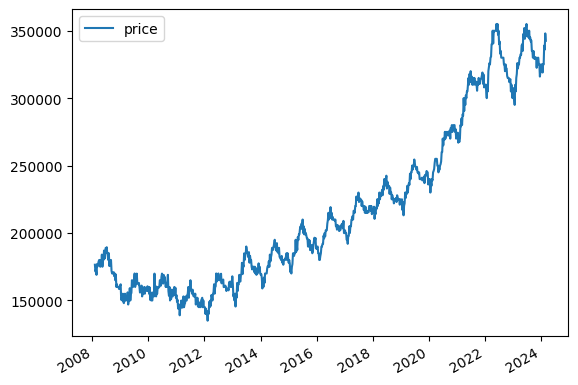

In [ ]:
#Plot with inlfation
#price column is avg. price houses sold in that week
#value column is the zillow computed avg.value of all houses in U.S
price_data.plot.line(y="price", use_index=True)

<Axes: >

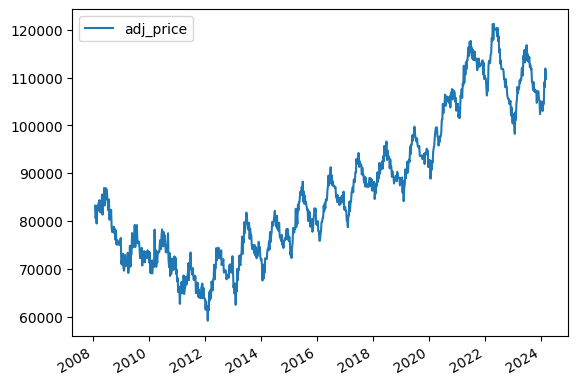

In [ ]:
#### Plot without inflation to only look at underlying house price change
price_data.plot.line(y="adj_price", use_index=True)


In [ ]:
## SETTING UP TARGET for Machine learning or what we want to predict:
# What will happen to house prices next quarter? So 3 months from now, go up of down?
price_data["next_quarter"] = price_data["adj_price"].shift(-13)
##shift method grabs adjusted price from 3 months into the future and pulls back to current row
#Shifting the Data: The code takes the prices from the "adj_price" column and moves them to a new column called "next_quarter".
# But it doesn't just copy the prices as they are; instead, it shifts them 13 positions into the future.
# So, each price in the "next_quarter" column is actually the price 13 time periods ahead.
# Why Shift?: This shifting can be useful in financial analysis.

In [ ]:
price_data.dropna(inplace=True)


In [ ]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,176500.0,198986.226816,83186.441317,93784.453711,85498.680346
2008-02-09,5.67,10.1,212.687,171450.0,198986.226816,80611.414896,93558.246069,81316.679677
2008-02-16,5.72,10.1,212.687,173000.0,198986.226816,81340.185343,93558.246069,83640.013382
2008-02-23,6.04,10.1,212.687,169000.0,198986.226816,79459.487416,93558.246069,83640.013382
2008-03-01,6.24,10.1,212.687,177000.0,197667.14787,83220.88327,92938.048809,86892.680569
...,...,...,...,...,...,...,...,...
2023-11-04,7.76,6.6,308.024,330000.0,354235.494756,107134.508999,115002.563033,104483.465893
2023-11-11,7.50,6.6,308.024,322500.0,354235.494756,104699.633795,115002.563033,108984.292116
2023-11-18,7.44,6.6,308.024,329800.0,354235.494756,107069.578994,115002.563033,108019.829354
2023-12-02,7.22,6.6,308.024,330000.0,352081.874078,107134.508999,114303.390021,111877.680403


In [ ]:
#Is the price 3 months from now higher or lower? Will return a bollean --> True (1) or False(0)
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)


In [ ]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,176500.0,198986.226816,83186.441317,93784.453711,85498.680346,1
2008-02-09,5.67,10.1,212.687,171450.0,198986.226816,80611.414896,93558.246069,81316.679677,1
2008-02-16,5.72,10.1,212.687,173000.0,198986.226816,81340.185343,93558.246069,83640.013382,1
2008-02-23,6.04,10.1,212.687,169000.0,198986.226816,79459.487416,93558.246069,83640.013382,1
2008-03-01,6.24,10.1,212.687,177000.0,197667.14787,83220.88327,92938.048809,86892.680569,1
...,...,...,...,...,...,...,...,...,...
2023-11-04,7.76,6.6,308.024,330000.0,354235.494756,107134.508999,115002.563033,104483.465893,0
2023-11-11,7.50,6.6,308.024,322500.0,354235.494756,104699.633795,115002.563033,108984.292116,1
2023-11-18,7.44,6.6,308.024,329800.0,354235.494756,107069.578994,115002.563033,108019.829354,1
2023-12-02,7.22,6.6,308.024,330000.0,352081.874078,107134.508999,114303.390021,111877.680403,1


In [ ]:
#how many weeks did the price go up and down? Balanced output, so its okay
price_data["change"].value_counts()


change
0    419
1    388
Name: count, dtype: int64

In [ ]:
#Create a list of predictors, use the 4 columns to predict the "change" column
predictors = ["interest", "vacancy", "adj_price", "adj_value"]
target = "change"

FINALLY Creating a Machine Learning Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

START = 260 #weeks in 5 years
STEP = 52 #weeks in a year

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target]) #train model on trainng set
    preds = rf.predict(test[predictors]) #get predictions on test set
    return preds

#We use "backtest" so model does not use data from the future to predict the past
def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i] #traing set is everything up until i
        test = price_data.iloc[i:(i+STEP)] #test set is the years following i
        all_preds.append(predict(train, test, predictors, target))
      #Starts with 5 years of data, then makes predictions for the next year
      ##so its gonna take data from 2008-2013 to predict 2014, and so on until we have predictions from 2014 through 2024

    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds) #will compare our actual values to our predicted values

Measuring Error

In [ ]:
preds, accuracy = backtest(price_data, predictors, target)


In [ ]:
preds

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
accuracy

0.5301645338208409

Improving Accuracy of Model

In [ ]:
yearly = price_data.rolling(52, min_periods=1).mean()


In [ ]:
#find the ratio between the current value and value last year from the predictor columns "interest", "vacancy", "adj_price", "adj_value"
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [ ]:
price_data
#as we can see below, the interest rate went down and rental vacancy rate went down,
# adjusted price went down and adjusted value went down compared to last value

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,176500.0,198986.226816,83186.441317,93784.453711,85498.680346,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,171450.0,198986.226816,80611.414896,93558.246069,81316.679677,1,0.999119,1.000000,0.984279,0.998793
2008-02-16,5.72,10.1,212.687,173000.0,198986.226816,81340.185343,93558.246069,83640.013382,1,1.005272,1.000000,0.995441,0.999195
2008-02-23,6.04,10.1,212.687,169000.0,198986.226816,79459.487416,93558.246069,83640.013382,1,1.045435,1.000000,0.979176,0.999396
2008-03-01,6.24,10.1,212.687,177000.0,197667.14787,83220.88327,92938.048809,86892.680569,1,1.063032,1.000000,1.020318,0.994208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-04,7.76,6.6,308.024,330000.0,354235.494756,107134.508999,115002.563033,104483.465893,0,1.153903,1.039055,0.98777,1.001464
2023-11-11,7.50,6.6,308.024,322500.0,354235.494756,104699.633795,115002.563033,108984.292116,1,1.113490,1.036545,0.965454,1.001533
2023-11-18,7.44,6.6,308.024,329800.0,354235.494756,107069.578994,115002.563033,108019.829354,1,1.103448,1.034046,0.987028,1.001603
2023-12-02,7.22,6.6,308.024,330000.0,352081.874078,107134.508999,114303.390021,111877.680403,1,1.068960,1.031560,0.987153,0.995699


<Axes: >

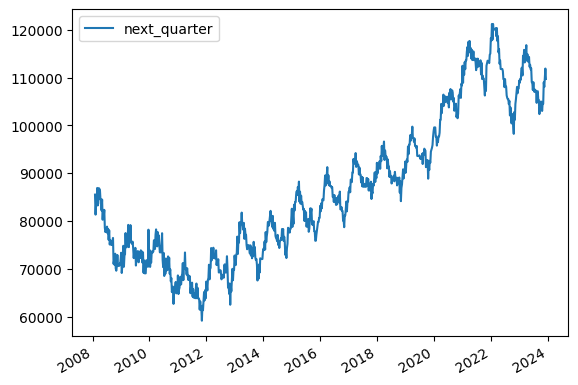

In [ ]:
price_data.plot.line(y="next_quarter", use_index=True)


In [ ]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)


In [ ]:
accuracy #so adding ratios helps improve accuracy

0.6179159049360147

Running diagnostics on model

In [ ]:
#We can plot out where our algorthim is making mistakes
pred_match = (preds == price_data[target].iloc[START:]) #comparing our predicted values to our actual values, will be true when aligned and false when its not aligned
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

<Axes: xlabel='index', ylabel='adj_price'>

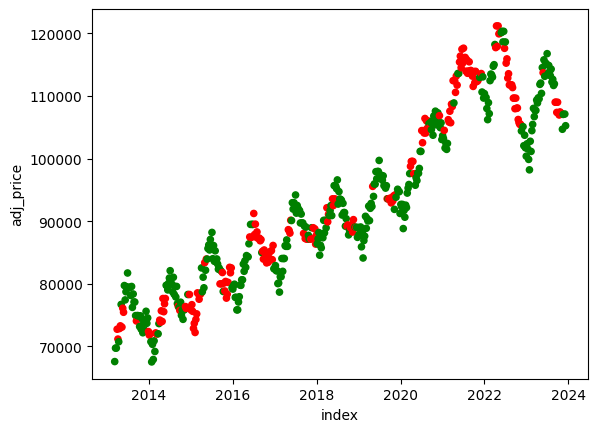

In [ ]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)
#the model is doing okay for the most part based on the similar movement patterns from the red and green datapoints

Another diagnostic

In [ ]:
#checking to see which columns are most important to the model
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)


In [ ]:
result["importances_mean"]
#the closer to 1, the better

array([0.20371747, 0.17434944, 0.26096654, 0.25960347])

In [ ]:
predictors
#we can see the most important factor among all 4, was adjusted price

['interest', 'vacancy', 'adj_price', 'adj_value']